In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
f = lambda x: 1 / np.sqrt(np.tan(x)) #integral 1

In [ ]:
x_int = np.linspace(1e-7, np.pi/2 - 1e-4, 1000000)

int_trap = trapezoid(f(x_int), x_int)
int_simp = simpson(f(x_int), x = x_int)
int_quad = quad(f, 1e-10, np.pi/2, epsabs = 1e-5)

print('Resultado de la integral usando el método de Trapezoid: ', int_trap)
print('Resultado de la integral usando el método de Simpson: ', int_simp)
print('Resultado de la integral usando el método de quad: ', int_quad)

Resultado de la integral usando el método de Trapezoid:  2.221992293431115
Resultado de la integral usando el método de Simpson:  2.2214075102521798
Resultado de la integral usando el método de quad:  (2.2214414722926143, 4.9606930629941814e-06)


In [ ]:
x = sp.symbols('x')

f1 = 1/sp.sqrt(sp.tan(x))

int_real = sp.integrate(f1, (x, 0, sp.pi/2)).evalf()

print('el error del método trapezoidal es: ', abs(int_real - int_trap))
print('el error del método Simpson es: ', abs(int_real - int_simp))
print('el error del método Quad es: ', int_quad[1])

el error del método trapezoidal es:  0.000550824351932100
el error del método Simpson es:  3.39588270032998e-5
el error del método Quad es:  4.9606930629941814e-06


In [ ]:
g1 = lambda x: np.cos(x) / x ** 3 # Integral 2
g = lambda t: -t * np.cos(1 / t) #Realizamos el cambio de variable por ser una integral al infinito

In [ ]:
x_int2 = np.linspace(1e-10, 1, 100)

int_2_trap = trapezoid(g(x_int2), x_int2)
int_2_simp = simpson(g(x_int2), x = x_int2)
int_2_quad = quad(g1, np.inf, 1, epsabs = 1e-5)

print('Resultado de la integral usando el método de Trapezoid: ', int_2_trap)
print('Resultado de la integral usando el método de Simpson: ', int_2_simp)
print('Resultado de la integral usando el método de quad: ', int_2_quad)

Resultado de la integral usando el método de Trapezoid:  -0.018726011732600297
Resultado de la integral usando el método de Simpson:  -0.01861880894671069
Resultado de la integral usando el método de quad:  (-0.018117412348155622, 7.237636778095746e-06)


In [ ]:
x = sp.symbols('x')

g2 = sp.cos(x) / x ** 3

int_real_2 = sp.integrate(g2, (x, 1, np.inf)).evalf()

print('el error del método trapezoidal es: ', abs(int_real_2 - int_2_trap))
print('el error del método Simpson es: ', abs(int_real_2 - int_2_simp))
print('el error del método Quad es: ', int_2_quad[1])

el error del método trapezoidal es:  0.0368436337132060
el error del método Simpson es:  0.0367364309273164
el error del método Quad es:  7.237636778095746e-06


In [ ]:
f2 = lambda y: 1 / np.sqrt(1 - y ** 2) # Integral 3
var = lambda x: np.sin(x) # Límite superior de la primera integral

In [ ]:
x_int_3 = np.linspace(0, np.pi/4, 100)
x_ = lambda x: np.linspace(0, np.sin(x), 100) # Límites de integración de las dos integrales

In [ ]:
int_3_trapy = lambda x: trapezoid(f2(x_(x)), x_(x))
int_3_trap = trapezoid(int_3_trapy(x_int_3), x_int_3)

# -------------------

int_3_simpy = lambda x: simpson(f2(x_(x)), x = x_(x))
int_3_simp = simpson(int_3_simpy(x_int_3), x = x_int_3)

# --------------------

integral_y = lambda x: quad(f2, 0, var(x))[0]
int_3_quad = quad(integral_y, 0, np.pi/4, epsabs = 1e-5)

print('Resultado de la integral usando el método de Trapezoid: ', int_3_trap)
print('Resultado de la integral usando el método de Simpson: ', int_3_simp)
print('Resultado de la integral usando el método de quad: ', int_3_quad)

Resultado de la integral usando el método de Trapezoid:  0.2915307213100427
Resultado de la integral usando el método de Simpson:  0.29152770563059077
Resultado de la integral usando el método de quad:  (0.30842513753404244, 3.424206890634745e-15)


In [ ]:
y = sp.symbols('y')
x = sp.symbols('x')

h = 1 / sp.sqrt(1 - y ** 2)

int_real_3 = sp.integrate(h, (y, 0, sp.sin(x)), (x, 0, sp.pi/4))

print('el error del método trapezoidal es: ', abs(int_real_2 - int_2_trap))
print('el error del método Simpson es: ', abs(int_real_2 - int_2_simp)) # ??
print('el error del método Quad es: ', int_2_quad[1])

el error del método trapezoidal es:  0.0368436337132060
el error del método Simpson es:  0.0367364309273164
el error del método Quad es:  7.237636778095746e-06


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



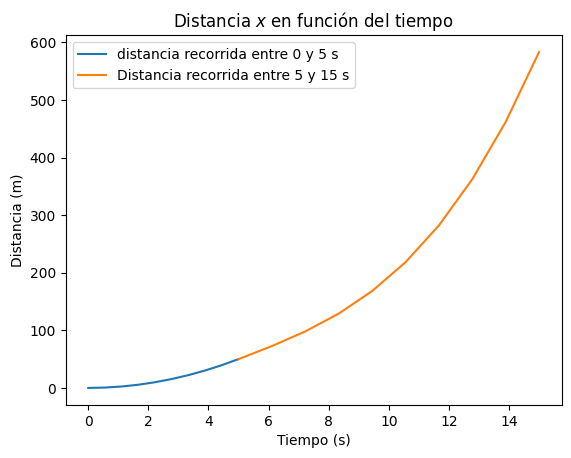

In [ ]:
vx1 = lambda t: 4 * t
vx2 = lambda t: 20 + (5 - t) ** 2
a = 0
b = 5
c = 15
t1 = np.linspace(0, 5, 10)
t2 = np.linspace(5, 15, 10)

r1 = np.array([quad(vx1, a, t)[0] for t in t1])
r2 = np.array([quad(vx2, b, t)[0] for t in t2])

plt.plot(t1, r1, label='distancia recorrida entre 0 y 5 s')
plt.plot(t2, r1[-1] + r2, label='Distancia recorrida entre 5 y 15 s')
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.title('Distancia $x$ en función del tiempo')
plt.legend()
plt.show()

In [ ]:
W1 = 200 * np.array(r1)
W2 = 200 * np.array(r2)

tiempo = np.concatenate((t1, t2))
trabajo = np.concatenate((W1, W2))

W1 + W2

array([     0.        ,   4659.35070873,  10114.31184271,  16913.58024691,
        25605.85276635,  36739.826246  ,  50864.19753086,  68527.66346594,
        90278.9208962 , 116666.66666667])

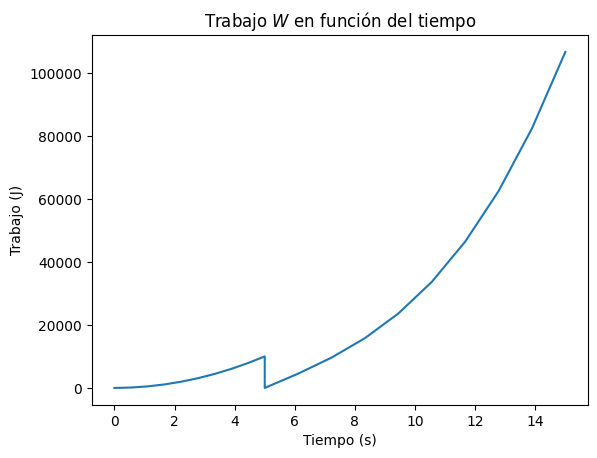

In [ ]:
plt.plot(tiempo, trabajo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Trabajo (J)")
plt.title('Trabajo $W$ en función del tiempo')
plt.show()

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


In [ ]:
Q = lambda t: 9 + (np.cos(0.4 * t) ** 2)
c = lambda t: (5 * np.exp(-0.5 * t)) + 2 * np.exp(0.15 * t)
Q_c = lambda t: Q(t) * c(t)
a = 2 * 60 #Para tener coherencia con el sistema CGS
b = 8 * 60
tiempo = np.linspace(a, b, 100)

M = [quad(Q_c, a, t)[0] for t in tiempo]
Romberg = [romberg(Q_c, a, t) for t in tiempo]

M1 = quad(Q_c, a, b)
Romberg1 = romberg(Q_c, a, b)

print('El valor de la integral usando el método de Romberg es:', Romberg1)
print('El valor de la integral usando Cuadratura es:', M1[0])

<ipython-input-53-fb6d548b7e0c>:9: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  Romberg = [romberg(Q_c, a, t) for t in tiempo]
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.455340e+15
  return fun(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.775688e+16
  return fun(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.376179e+16
  return fun(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.669987e+16
  return fun(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:91: A

El valor de la integral usando el método de Romberg es: 2.3723608565271863e+33
El valor de la integral usando Cuadratura es: 2.3723608497033255e+33


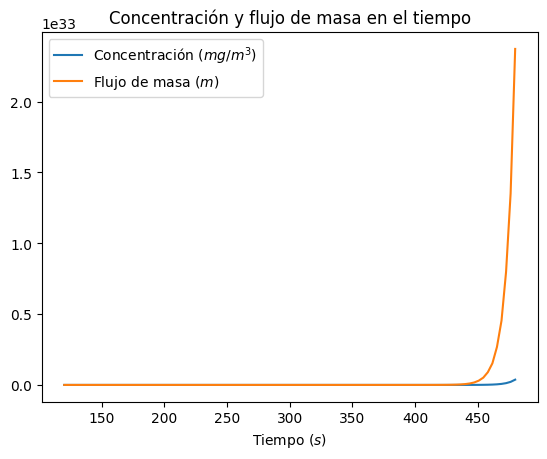

In [ ]:
plt.plot(tiempo, c(tiempo), label = 'Concentración $(mg / m^3)$')
plt.plot(tiempo, Romberg, label = 'Flujo de masa $(m)$')
plt.title('Concentración y flujo de masa en el tiempo')
plt.xlabel('Tiempo ($s$)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Concentración respecto al tiempo')

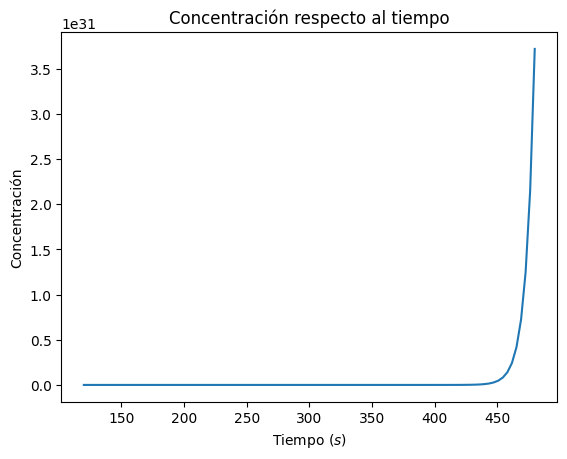

In [ ]:
plt.plot(tiempo, c(tiempo), label = 'Concentración $(mg / m^3)$')
plt.xlabel('Tiempo ($s$)')
plt.ylabel('Concentración')
plt.title('Concentración respecto al tiempo')

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
# Suposición de parámetros iniciales
a = 1/2 # a = I0 / m * b
g = 9.8
theta0 = np.pi / 2
k = np.sin(theta0 / 2)

seno_phi = lambda theta: np.sin(theta / 2) / np.sin(theta0 / 2)
dphi = lambda theta: (1 / 2) * np.cos(theta/2) / np.sin(theta0 / 2)

p0 = 2 * np.pi * np.sqrt(a / g)

P = (2 * p0 / np.pi) * quad(lambda theta: dphi(theta) / np.sqrt(1 - k ** 2 * seno_phi(theta) ** 2), 0, np.pi/2)[0]
print('El periodo de oscilaciones para el péndulo con los parámetros propuestos es:' , P)

El periodo de oscilaciones para el péndulo con los parámetros propuestos es: 1.0035449615772467


In [ ]:
theta_ = sp.symbols("theta")

seno_phi_ = sp.sin(theta_ / 2) / sp.sin(theta0 / 2)

dphi_ = 1 / 2 * sp.cos(theta_ / 2) / (sp.sin(theta0 / 2))

integrando = dphi_ / sp.sqrt(1 - k ** 2 * seno_phi_ ** 2 )

P_ = (2 * p0 / np.pi) * sp.integrate(integrando, (theta_, 0, np.pi/2)).evalf()

P_

1.00354496157725

#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
from sympy import integrate

In [ ]:
ft = lambda t: 22.8 / (3.5 + 7 * (t - 1.25) ** 4)
t = np.linspace(0, 120, 1000) # 120 minutos = 2 horas

integral = trapezoid(ft(t), t)

print(f' el número de autos que cruzan entre las 4 y las 6 es: {integral}')

 el número de autos que cruzan entre las 4 y las 6 es: 11.65253874500775


In [ ]:
integral_ = np.zeros(1000)

for n in range(1, 1000):

  t = np.linspace(0, 120, n)
  integral_[n] = trapezoid(ft(t), t)

  while abs(integral_[n-1] - integral_[n]) > 5e-2:
    n *= 2

print('El resultado de la integral con un error menor al 5% es: ', integral_[-1])

El resultado de la integral con un error menor al 5% es:  11.652531681610737


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
a = 1
I = 3
k = 1

k_2 = lambda r, theta: (4 * a * r * np.sin(theta)) / (a ** 2 + r ** 2 + 2 * a * r * np.sin(theta))

K = lambda r, theta : quad(lambda phi: 1 / np.sqrt(1 - k_2(r, theta) * np.sin(phi) ** 2), 0, np.pi/2)[0]

E = lambda r, theta: quad(lambda phi: np.sqrt(1 - k_2(r, theta) * np.sin(phi) ** 2), 0, np.pi/2)[0]

A = lambda r, theta: (k * 4 * I * a / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta))) * (((2 - k_2(r, theta)) * K(r, theta) - 2 * E(r, theta))/ k_2(r, theta))

<ipython-input-28-001f69a28ebb>:11: RuntimeWarning: invalid value encountered in scalar divide
  A = lambda r, theta: (k * 4 * I * a / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta))) * (((2 - k_2(r, theta)) * K(r, theta) - 2 * E(r, theta))/ k_2(r, theta))


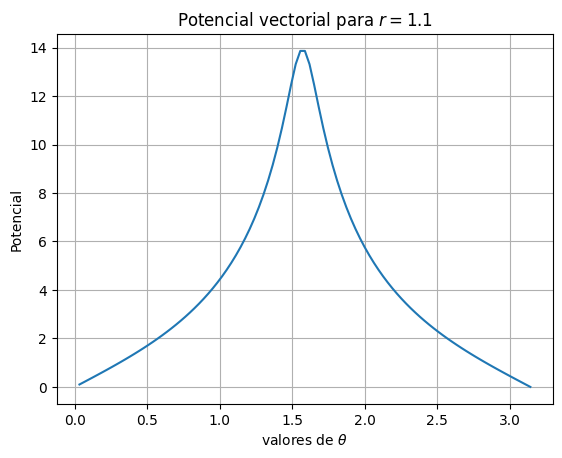

In [ ]:
theta = np.linspace(0, np.pi - 1e-8, 100)
values1 = np.zeros(100)

for i in range(len(theta)):
    values1[i] = A(1.1, theta[i])

plt.plot(theta, values1)
plt.grid()
plt.title('Potencial vectorial para $ r = 1.1$')
plt.xlabel(r'valores de $\theta$')
plt.ylabel('Potencial')
plt.show()

<ipython-input-28-001f69a28ebb>:11: RuntimeWarning: invalid value encountered in scalar divide
  A = lambda r, theta: (k * 4 * I * a / np.sqrt(a ** 2 + r ** 2 + 2 * a * r * np.sin(theta))) * (((2 - k_2(r, theta)) * K(r, theta) - 2 * E(r, theta))/ k_2(r, theta))


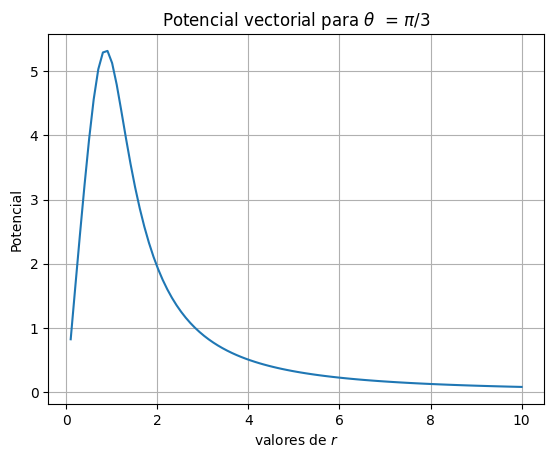

In [ ]:
r = np.linspace(0, 10 - 1e-10, 100)
values2 = np.zeros(100)

for i in range(len(r)):
    values2[i] = A(r[i], np.pi/3)

plt.plot(r, values2)
plt.grid()
plt.title(r'Potencial vectorial para $\theta$  = $\pi/3$')
plt.xlabel(r'valores de $r$')
plt.ylabel('Potencial')
plt.show()